In [1]:
# HI There, Just relax and enjoy the show :)

# Your task in this challenge is to predict the cost of the houses in particular blocks 
# based on different sociodemographic attributes 
# (It's up to you to decide which attributes you want to use, you can include location information or not)

# You can use any of the libraries that you want
# These libraries below are just a recommendation



# CHALLENGE 1: If some of those libraries are  not available on your system,
# you would need to resolve the dependencies as part of this challenge

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
from sklearn.datasets import fetch_california_housing

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
#from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

%matplotlib inline

In [2]:
#############################################################################################
# We will work with this dataset in the next steps
# CHALLENGE 2: Load the data ( it will get harder :) )
df = fetch_california_housing(as_frame=True)["frame"]
df.head()

# ---- Attribute Information ----:
# MedInc:  median income in block
# HouseAge:  median house age in block
# AveRooms:  average number of rooms
# AveBedrms:  average number of bedrooms
# Population:  block population
# AveOccup:  average house occupancy
# Latitude:  house block latitude
# Longitude:  house block longitude
# MedHouseVal: the median house value for California districts (!! our target variable !!)

# This dataset was derived from the 1990 U.S. census, using one row per census
# block group. A block group is the smallest geographical unit for which the U.S.
# Census Bureau publishes sample data (a block group typically has a population
# of 600 to 3,000 people).

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
#############################################################################################
# CHALLENGE 3: Explorative Data Analysis and Data Cleaning
# Examine the data for outliers, missing values and try to apply some
# cleaning on the data. Provide visualization if possible
# Do you see any patterns, correlations in the data?
# Please describe your observations

## Explorative Data Analysis

In [4]:
# check for nan
df.isnull().values.any()

False

We check for missing values and can not find any in this data set

In [5]:
# show info about attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


The data set consists of 9 attributes and has 20640 instances. All of the attributes are continuous variables.

In [6]:
# show descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


Examening the descriptive statistics we can see the attributes `AveOccup`, `AveRooms` and `AveBedrms` having very high maximum values comared to mean +/- standard varation. This is the first indication for outliers in this data set.

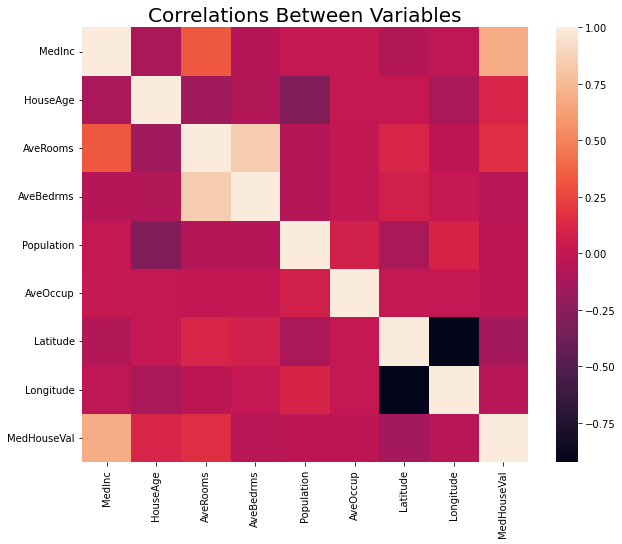

In [7]:
# plot correlations between variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.title("Correlations Between Variables", size=20)
plt.show()

This figure shows us the correlations between each of the variables. We can see that: 
* `MedHouseVal` has a high positive correlation with `MedInc`
* `AveRooms` has a high positive correlation with `AveBedrms`
* `Latitude` has a high negative correlation with `Longitude`

In [8]:
# print correlation coefficients
print("correlation coefficients between each attribute and MedHouseVal\n")
print(df.corr().loc[:,'MedHouseVal'])

correlation coefficients between each attribute and MedHouseVal

MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64


The list correlation coefficients between each attribute and the target variable `MedHouseVal` show that spacially the attribute `MedInc` has a high correlation with `MedHouseVal`.

distribution of each attribute with MedHouseVal



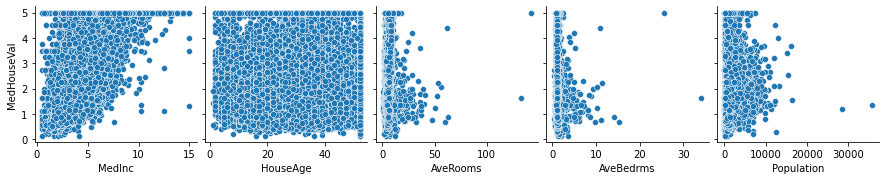

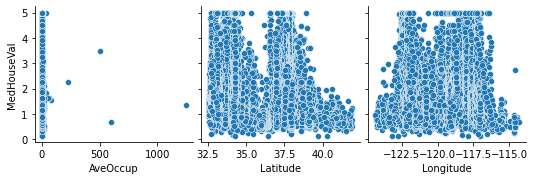

In [9]:
# plot distribution between attributes and 'MedHouseVal'
print("distribution of each attribute with MedHouseVal\n")
col = df.columns[:-1]
for i in np.arange(0,9,5):
    sns.pairplot(data=df, x_vars=col[i:i+5], y_vars = 'MedHouseVal')

The plots show the distribution of each attribute with `MedHouseVal`. Here we can see that the features `AveOccup`, `AveRooms`, `AveBedrms` and `Population` seem to have outliers.

In [10]:
# remove outliers

print(df.shape)

df = df[df['AveOccup']<30]
df = df[df['AveRooms']<48]
df = df[df['AveBedrms']<10]
df = df[df['Population']<20000]

print(df.shape)

(20640, 9)
(20619, 9)


Based on the figures above we select thresholds for the four attributes with outliers `AveOccup`, `AveRooms`, `AveBedrms` as well as `Population` and remove them from the data set. In total we removed 21 instances.

distribution of each attribute with MedHouseVal



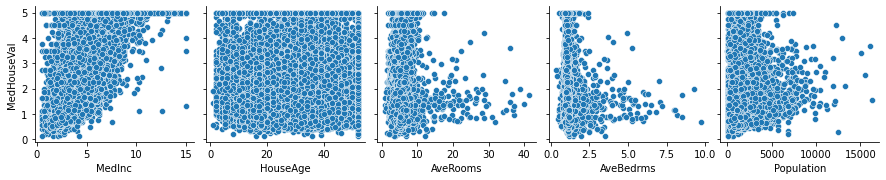

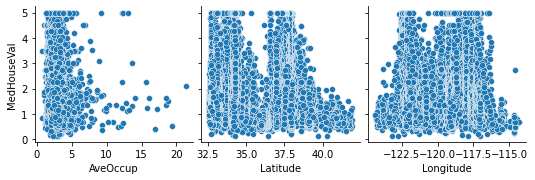

In [11]:
# plot distribution between attributes and 'MedHouseVal' after outlier removal
print("distribution of each attribute with MedHouseVal\n")
col = df.columns[:-1]
for i in np.arange(0,9,5):
    sns.pairplot(data=df, x_vars=col[i:i+5], y_vars = 'MedHouseVal')

In [12]:
# check for inconsistencies
df[df['AveRooms']<=df['AveBedrms']]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3126,2.375,4.0,1.000000,1.000000,6.0,3.000000,35.21,-117.79,1.375
5916,2.875,46.0,0.846154,0.846154,24.0,1.846154,34.28,-118.44,1.625
19435,0.536,16.0,2.111111,2.111111,166.0,18.444444,37.67,-121.04,1.625


In [37]:
df[df['AveRooms']<1]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
5916,2.8750,46.0,0.846154,0.846154,24.0,1.846154,34.28,-118.44,1.625
8219,4.5938,33.0,0.888889,0.500000,96.0,2.666667,33.79,-118.21,1.125


In [13]:
# check for inconsistencies
df[(df['AveRooms']<=1) & (df['MedHouseVal']>=5)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


In [14]:
#############################################################################################
# CHALLENGE 4: Now divide your dataset into train- and testset and apply any models you want
# (you can use any frameworks you want e.g sklearn, tensorflow etc)


In [15]:
###########################
###   preprocess data   ###
###########################

# split into input and target variable
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=399)

# define KFold cross validation splits
kf5 = KFold(n_splits=5, shuffle=True, random_state=0)

print("Shape of X_train: {}    Shape of y_train: {}" .format(X_train.shape, y_train.shape))
print("Shape of X_test: {}    Shape of y_test: {}" .format(X_test.shape, y_test.shape))

Shape of X_train: (16495, 8)    Shape of y_train: (16495,)
Shape of X_test: (4124, 8)    Shape of y_test: (4124,)


1. we detach the target variable (`y`) for the input variables (`X`)
2. we standerdize the data to help some of the regression algorithms to perform better
3. we split the data into a test (20%) and training set (80%)

In [16]:
#############################################################################################
# CHALLENGE 5: Measure the results of your models and apply model selection
# Please argue why would you select one model over another

In [17]:
# define functions for evaluation of the models

def rmse_cv(model):
    '''preform cross validation'''
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    
def evaluation(y, predictions):
    ''' evaluation of models'''
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [18]:
# create a dataframe for storing the model scores
model_scores = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2","RMSE (Cross-Validation)"])

Feature MedInc: 15043.663054371957
Feature HouseAge: 193.32855940817333
Feature AveRooms: 719.608809118122
Feature AveBedrms: 93.61159270689484
Feature Population: 6.976285038215585
Feature AveOccup: 940.5091122135059
Feature Latitude: 328.3830278594685
Feature Longitude: 44.661571173828435


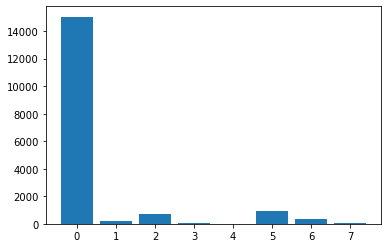

In [19]:
#########################
### feature selection ###
#########################

def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# get feature names
feature_names = df.iloc[:,:-1].columns.tolist()
# feature scores
for i in range(len(fs.scores_)):
    print('Feature {}: {}'.format(feature_names[i], fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

We perform a simple feature selection

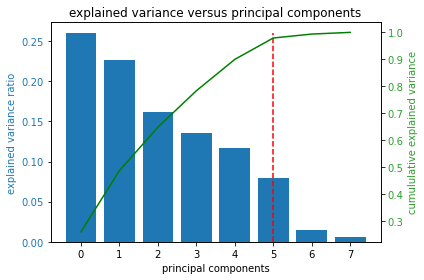

In [20]:
##############################################
###   PCA - Principal component analysis   ###
##############################################

# fit PCA
pca = PCA(n_components=X_train.shape[1], svd_solver='full')
pca.fit(X_train) # X

# make cumulative array of the variance
culm_var = np.cumsum(pca.explained_variance_ratio_)
    
# find 70%
idx_07 = (np.abs(culm_var-0.95)).argmin()

# make plot
fig, ax1 = plt.subplots()
plt.title('explained variance versus principal components')

# plot explained variance ratio
color = 'tab:blue'
ax1.set_xlabel('principal components')
ax1.set_ylabel('explained variance ratio', color=color)
ax1.bar(np.arange(X_train.shape[1]), pca.explained_variance_ratio_)
ax1.tick_params(axis='y', labelcolor=color)

# plot 80% of the variance is explained
ax1.vlines(idx_07, 0, pca.explained_variance_ratio_.max(), colors='k', linestyles='--', label='80%', color='r')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# plot cumative variance
color = 'tab:green'
ax2.set_ylabel('cumululative explained variance', color=color)  # we already handled the x-label with ax1
ax2.plot(np.arange(X_train.shape[1]), culm_var, color='g')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [21]:
### create PCs
pca = PCA(n_components=idx_07, svd_solver='full')
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [24]:
# linear regression

lin_reg = LinearRegression()
lin_reg.fit(X_train[:,[0]], y_train)
predictions = lin_reg.predict(X_test[:,[0]])

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
model_scores = model_scores.append(new_row, ignore_index=True)

MAE: 0.6277082147898647
MSE: 0.700476422229596
RMSE: 0.8369446948452425
R2 Score: 0.46339909589821404
------------------------------
RMSE Cross-Validation: 0.7113904007113441


In [25]:
# multiple linear regression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
model_scores = model_scores.append(new_row, ignore_index=True)

MAE: 0.5003145552402178
MSE: 0.4695260757620034
RMSE: 0.6852197280887375
R2 Score: 0.6403189190132751
------------------------------
RMSE Cross-Validation: 0.7113904007113441


In [26]:
# multiple linear regression with feature selection

lin_reg = LinearRegression()
lin_reg.fit(X_train[:,[0,1,2,5,6]], y_train)
predictions = lin_reg.predict(X_test[:,[0,1,2,5,6]])

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
model_scores = model_scores.append(new_row, ignore_index=True)

MAE: 0.557661779059465
MSE: 0.5682196198863948
RMSE: 0.7538034358414631
R2 Score: 0.5647145969754386
------------------------------
RMSE Cross-Validation: 0.7113904007113441


In [27]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
model_scores = model_scores.append(new_row, ignore_index=True)

MAE: 0.4432206474614125
MSE: 0.3981806502694606
RMSE: 0.6310155705443888
R2 Score: 0.6949731780402502
------------------------------
RMSE Cross-Validation: 0.7113904007113441


In [28]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
model_scores = model_scores.append(new_row, ignore_index=True)

MAE: 0.500299233772213
MSE: 0.46951796822960845
RMSE: 0.6852138120540249
R2 Score: 0.640325129799356
------------------------------
RMSE Cross-Validation: 0.7113915107333453


In [29]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
model_scores = model_scores.append(new_row, ignore_index=True)

MAE: 0.9038378643179942
MSE: 1.305452184793653
RMSE: 1.1425638646454968
R2 Score: -4.339959399812798e-05
------------------------------
RMSE Cross-Validation: 1.1688340915202697


In [30]:

elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
model_scores = model_scores.append(new_row, ignore_index=True)

MAE: 0.8037439832508908
MSE: 1.0349226753119634
RMSE: 1.0173114937480867
R2 Score: 0.20719609450921117
------------------------------
RMSE Cross-Validation: 1.0461275480373073


In [31]:
svr = SVR(C=100)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
model_scores = model_scores.append(new_row, ignore_index=True)

MAE: 0.35171448853352855
MSE: 0.2839988361951127
RMSE: 0.5329154118573722
R2 Score: 0.7824423100764952
------------------------------
RMSE Cross-Validation: 0.6492663722300783


In [43]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
model_scores = model_scores.append(new_row, ignore_index=True)

MAE: 0.32506323094083434
MSE: 0.2409456895777714
RMSE: 0.4908621900062903
R2 Score: 0.8154232308700288
------------------------------
RMSE Cross-Validation: 0.6503633693018804


In [39]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train_pca, y_train)
predictions = random_forest.predict(X_test_pca)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor with PCA","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
model_scores = model_scores.append(new_row, ignore_index=True)

MAE: 0.4711903293404463
MSE: 0.4417084586679886
RMSE: 0.6646115095813407
R2 Score: 0.6616286419516911
------------------------------
RMSE Cross-Validation: 0.6528378397074429


In [ ]:
# CHALLENGE 5: Measure the results of your models and apply model selection
# Please argue why would you select one model over another

In [42]:
model_scores

,Model,MAE,MSE,RMSE,R2,RMSE (Cross-Validation),R2 Score


The best performing model is the RandomForestRegressor since the RMSE is the lowest and the R2 score is the highest on the test set.

In [ ]:
# CHALLENNGE 6: Write a summary report of your results, including plots and 
#discussion of your results (You can reuse the outcome/plots from above). 
#The report shall cover the following questions:
# 1. What was most interesting/surprising for you when you explored and visualized the data?
# 2. What was the biggest problem for you to complete all challenges, and how did you solve the problem?
# 3. Which model performed best, and why?
# 4. ...

The daataset has several ouliers that are described in section 3. It seems that there are block groups where the `'AveRooms` is smale than 1. Which is very suprising sicne 1 room should be the minimum. It was also suprising to see that there are block groups where the `'AveRooms` is exactly the same as `AveBedrms`. 

This problem is a classic multiple regression problem.
The feature `MedInc` is by far the most important single feature for predicting the target feature `MedHouseVal`. A linear regression just with just this feature provides already a reasnable model for `MedHouseVal` prediction.

The biggest 

The best performing model is the RandomForestRegressor since the RMSE is the lowest and the R2 score is the highest on the test set.